<a href="https://colab.research.google.com/github/Fatimakhanim/Machine-learning-Projects/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame = True)
X = iris.data[["petal length (cm)","petal width (cm)"]].values
y = (iris.target ==2)

svm_clf = make_pipeline(StandardScaler(),
                        LinearSVC(C=1,random_state = 42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [2]:
X_new = [[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [3]:
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X,y = make_moons(n_samples=100,noise = 0.15,random_state = 42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree = 3),
    StandardScaler(),
    LinearSVC(C = 10,max_iter=10_000,dual = True,random_state=42)
)
polynomial_svm_clf.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

In [5]:
import matplotlib.pyplot as plt

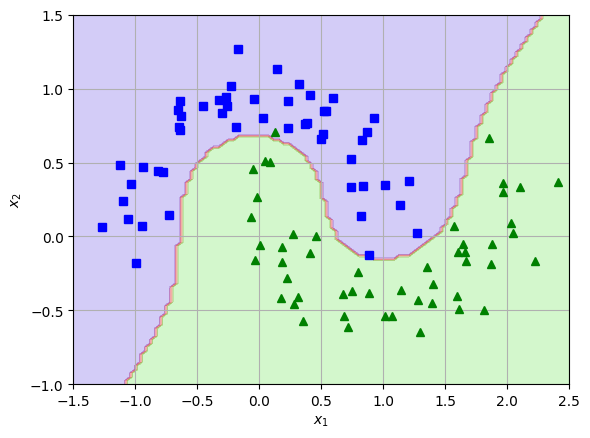

In [6]:
def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")

def plot_predictions(clf,axes):
  x0s = np.linspace(axes[0],axes[1],100)
  x1s = np.linspace(axes[2],axes[3],100)
  x0,x1 = np.meshgrid(x0s,x1s)
  X = np.c_[x0.ravel(),x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)

  plt.contourf(x0,x1,y_pred,cmap = plt.cm.brg,alpha = 0.2)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

#Polynomial Kernel

In [7]:
from sklearn.svm import SVC
polynomial_kernel_svm_clf = make_pipeline(StandardScaler(),
                                          SVC(kernel = "poly",degree=3,coef0=1,C=5))

polynomial_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [8]:
import numpy as np

In [9]:
from sklearn.svm import LinearSVR

np.random.seed(42)
X = 2* np.random.rand(50,1)
y = 4+3* X[:,0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(),
                        LinearSVR(epsilon = 0.5,dual = True,random_state = 42))

svm_reg.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])